In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sqrt.xlsx to sqrt.xlsx


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import io
import pandas as pd
df = pd.read_excel(io.BytesIO(uploaded['sqrt.xlsx']))
dt = pd.read_excel(io.BytesIO(uploaded['sqrt.xlsx']))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from fancyimpute import  KNN
import warnings
import os
warnings.filterwarnings("ignore")

In [ ]:
df.head()

,AGE,ADDRESS,AREA,CITY/STATE/COUNTRY,BANGALORE(Y/N),NRI / NON NRI,PINCODE,TYPE OF COMPLEX,multiple complex,FLAT/PLOT,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,TOTAL UNIT COST,YEAR BUCKET,RELIGION SORTED,CATEGORY SORTED,CASTE SORTED,LANGUAGE,COMMUNITY,Square feet,Square feet range
0,NaN,0,NaN,NaN,N,NaN,0,Aqua,NaN,FLAT,NaN,N,0,5260810,YR_5,Hindu,General,OtherUpperCaste,Bengali,"Bengali,Odiya,Punjabi",4594.59,4500 to 5000
1,NaN,Mr. Savina G B No.13 Gare Ravikumar Layout Byc...,Devanahalli,BANGALORE,Y,NO,562110,Aqua,No,FLAT,NaN,N,0,5526317,YR_5,NaN,NaN,NaN,NaN,NaN,4589.96,4500 to 5000
2,NaN,0,NaN,NaN,N,NaN,0,Aqua,NaN,FLAT,NaN,N,0,5022020,YR_5,Sikh,General,Jatt,Punjabi,Punjabi,4329.33,4000 to 4500
3,NaN,Mr.Umer Farooque.P#251st Cross 1st Main L B S...,H.A.L,BANGALORE,Y,NO,560017,Aqua,No,FLAT,NaN,N,0,4009324,YR_5,NaN,NaN,NaN,NaN,NaN,4278.89,4000 to 4500
4,NaN,Mr. Ramesh SEmp.No.2720 Honeywell #151/1 Dorai...,Deepanjalinagar,BANGALORE,Y,NO,560026,Aqua,No,FLAT,NaN,N,0,4581436,YR_5,NaN,NaN,NaN,NaN,NaN,4001.25,4000 to 4500


In [ ]:
df = df.drop(['ADDRESS','PINCODE','AREA'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 602 non-null    float64
 1   CITY/STATE/COUNTRY  518 non-null    object 
 2   BANGALORE(Y/N)      742 non-null    object 
 3   NRI / NON NRI       513 non-null    object 
 4   TYPE OF COMPLEX     742 non-null    object 
 5   multiple complex    333 non-null    object 
 6   FLAT/PLOT           742 non-null    object 
 7   TYPE OF FLAT        621 non-null    object 
 8   PLOT(Y/N)           742 non-null    object 
 9   NO OF PLOTS         742 non-null    int64  
 10  TOTAL UNIT COST     741 non-null    object 
 11  YEAR BUCKET         738 non-null    object 
 12  RELIGION SORTED     245 non-null    object 
 13  CATEGORY SORTED     245 non-null    object 
 14  CASTE SORTED        245 non-null    object 
 15  LANGUAGE            245 non-null    object 
 16  COMMUNIT

In [ ]:
df['CITY/STATE/COUNTRY'] = df['CITY/STATE/COUNTRY'].astype('category')
df['BANGALORE(Y/N)'] = df['BANGALORE(Y/N)'].astype('category')
df['TYPE OF COMPLEX'] = df['TYPE OF COMPLEX'].astype('category')
df['NRI / NON NRI'] = df['NRI / NON NRI'].astype('category')
df['multiple complex'] = df['multiple complex'].astype('category')
df['FLAT/PLOT'] = df['FLAT/PLOT'].astype('category')
df['TYPE OF FLAT'] = df['TYPE OF FLAT'].astype('category')
df['PLOT(Y/N)'] = df['PLOT(Y/N)'].astype('category')
df['TOTAL UNIT COST'] = df['TOTAL UNIT COST'].astype('category')
df['YEAR BUCKET'] = df['YEAR BUCKET'].astype('category')
df['RELIGION SORTED'] = df['RELIGION SORTED'].astype('category')
df['CATEGORY SORTED'] = df['CATEGORY SORTED'].astype('category')
df['CASTE SORTED'] = df['CASTE SORTED'].astype('category')
df['LANGUAGE'] = df['LANGUAGE'].astype('category')
df['COMMUNITY'] = df['COMMUNITY'].astype('category')
df['Square feet range'] = df['Square feet range'].astype('category')

In [ ]:
df['CITY/STATE/COUNTRY'] = df['CITY/STATE/COUNTRY'].cat.codes
df['BANGALORE(Y/N)'] = df['BANGALORE(Y/N)'].cat.codes
df['TYPE OF COMPLEX'] = df['TYPE OF COMPLEX'].cat.codes
df['NRI / NON NRI'] = df['NRI / NON NRI'].cat.codes
df['multiple complex'] = df['multiple complex'].cat.codes
df['FLAT/PLOT'] = df['FLAT/PLOT'].cat.codes
df['TYPE OF FLAT'] = df['TYPE OF FLAT'].cat.codes
df['PLOT(Y/N)'] = df['PLOT(Y/N)'].cat.codes
df['TOTAL UNIT COST'] = df['TOTAL UNIT COST'].cat.codes
df['YEAR BUCKET'] = df['YEAR BUCKET'].cat.codes
df['RELIGION SORTED'] = df['RELIGION SORTED'].cat.codes
df['CATEGORY SORTED'] = df['CATEGORY SORTED'].cat.codes
df['CASTE SORTED'] = df['CASTE SORTED'].cat.codes
df['LANGUAGE'] = df['LANGUAGE'].cat.codes
df['COMMUNITY'] = df['COMMUNITY'].cat.codes
df['Square feet range'] = df['Square feet range'].cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 602 non-null    float64
 1   CITY/STATE/COUNTRY  742 non-null    int8   
 2   BANGALORE(Y/N)      742 non-null    int8   
 3   NRI / NON NRI       742 non-null    int8   
 4   TYPE OF COMPLEX     742 non-null    int8   
 5   multiple complex    742 non-null    int8   
 6   FLAT/PLOT           742 non-null    int8   
 7   TYPE OF FLAT        742 non-null    int8   
 8   PLOT(Y/N)           742 non-null    int8   
 9   NO OF PLOTS         742 non-null    int64  
 10  TOTAL UNIT COST     742 non-null    int16  
 11  YEAR BUCKET         742 non-null    int8   
 12  RELIGION SORTED     742 non-null    int8   
 13  CATEGORY SORTED     742 non-null    int8   
 14  CASTE SORTED        742 non-null    int8   
 15  LANGUAGE            742 non-null    int8   
 16  COMMUNIT

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)
df_imputer = imputer.fit_transform(df)
df_imputer

array([[ 3.60000e+01, -1.00000e+00,  0.00000e+00, ...,  9.00000e+00,
         4.59459e+03,  1.00000e+00],
       [ 4.40000e+01,  5.00000e+00,  1.00000e+00, ..., -1.00000e+00,
         4.58996e+03,  1.00000e+00],
       [ 4.70000e+01, -1.00000e+00,  0.00000e+00, ...,  4.00000e+01,
         4.32933e+03,  0.00000e+00],
       ...,
       [ 3.70000e+01,  7.00000e+00,  0.00000e+00, ...,  1.00000e+01,
         4.66819e+03,  1.00000e+00],
       [ 3.90000e+01,  5.00000e+00,  1.00000e+00, ..., -1.00000e+00,
         4.69138e+03,  1.00000e+00],
       [ 3.40000e+01,  5.00000e+00,  1.00000e+00, ..., -1.00000e+00,
         4.40376e+03,  0.00000e+00]])

In [ ]:
df.head()

,AGE,CITY/STATE/COUNTRY,BANGALORE(Y/N),NRI / NON NRI,TYPE OF COMPLEX,multiple complex,FLAT/PLOT,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,TOTAL UNIT COST,YEAR BUCKET,RELIGION SORTED,CATEGORY SORTED,CASTE SORTED,LANGUAGE,COMMUNITY,Square feet,Square feet range
0,NaN,-1,0,-1,14,-1,0,-1,0,0,184,3,1,0,11,3,9,4594.59,1
1,NaN,5,1,0,14,0,0,-1,0,0,209,3,-1,-1,-1,-1,-1,4589.96,1
2,NaN,-1,0,-1,14,-1,0,-1,0,0,148,3,4,0,4,28,40,4329.33,0
3,NaN,5,1,0,14,0,0,-1,0,0,46,3,-1,-1,-1,-1,-1,4278.89,0
4,NaN,5,1,0,14,0,0,-1,0,0,65,3,-1,-1,-1,-1,-1,4001.25,0


In [ ]:
# array to df
encode_data = pd.DataFrame(np.round(imputer.fit_transform(df_imputer)), columns= df.columns)
encode_data

,AGE,CITY/STATE/COUNTRY,BANGALORE(Y/N),NRI / NON NRI,TYPE OF COMPLEX,multiple complex,FLAT/PLOT,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,TOTAL UNIT COST,YEAR BUCKET,RELIGION SORTED,CATEGORY SORTED,CASTE SORTED,LANGUAGE,COMMUNITY,Square feet,Square feet range
0,36.0,-1.0,0.0,-1.0,14.0,-1.0,0.0,-1.0,0.0,0.0,184.0,3.0,1.0,0.0,11.0,3.0,9.0,4595.0,1.0
1,44.0,5.0,1.0,0.0,14.0,0.0,0.0,-1.0,0.0,0.0,209.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,4590.0,1.0
2,47.0,-1.0,0.0,-1.0,14.0,-1.0,0.0,-1.0,0.0,0.0,148.0,3.0,4.0,0.0,4.0,28.0,40.0,4329.0,0.0
3,42.0,5.0,1.0,0.0,14.0,0.0,0.0,-1.0,0.0,0.0,46.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,4279.0,0.0
4,43.0,5.0,1.0,0.0,14.0,0.0,0.0,-1.0,0.0,0.0,65.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,4001.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,32.0,9.0,0.0,0.0,6.0,-1.0,0.0,14.0,0.0,0.0,359.0,0.0,4.0,0.0,13.0,28.0,40.0,4387.0,0.0
738,49.0,5.0,1.0,0.0,6.0,0.0,0.0,8.0,0.0,0.0,335.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,5024.0,2.0
739,37.0,7.0,0.0,0.0,6.0,-1.0,0.0,1.0,0.0,0.0,182.0,0.0,1.0,0.0,0.0,3.0,10.0,4668.0,1.0
740,39.0,5.0,1.0,0.0,6.0,0.0,0.0,14.0,0.0,0.0,555.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,4691.0,1.0


In [ ]:
# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(encode_data)

# normalizing the data
normalized_df = normalize(scaled_df)

# converting the numpy array into a pandas Dataframe
normalized_df = pd.DataFrame(normalized_df, columns= encode_data.columns)
print(normalized_df)

          AGE  CITY/STATE/COUNTRY  ...  Square feet  Square feet range
0   -0.256331           -0.185980  ...    -0.167159          -0.084691
1   -0.075097           -0.126915  ...    -0.219547          -0.109409
2    0.011070           -0.127135  ...    -0.215622          -0.250531
3   -0.110061           -0.100413  ...    -0.350879          -0.374589
4   -0.080437           -0.095316  ...    -0.483406          -0.355576
..        ...                 ...  ...          ...                ...
737 -0.217678           -0.024344  ...    -0.173377          -0.224451
738  0.075263           -0.112467  ...     0.082376           0.225648
739 -0.257314           -0.076671  ...    -0.140539          -0.094112
740 -0.191240           -0.103227  ...    -0.119417          -0.088988
741 -0.294014           -0.094431  ...    -0.263004          -0.352272

[742 rows x 19 columns]


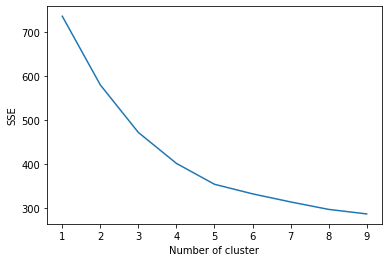

In [ ]:
sse = {}
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, max_iter=1000).fit(normalized_df)
  sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

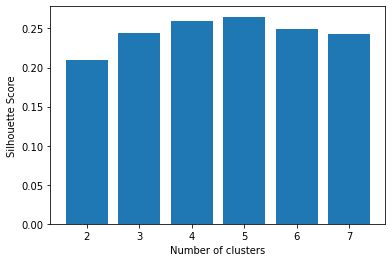

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normalized_df, KMeans(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

optimal cluster 6 


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(normalized_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# determine which cluster each dat point belong
clusters = kmeans.predict(normalized_df)

# add cluster number to orginal data
normalized_df['cluster'] = clusters
normalized_df.head()

,AGE,CITY/STATE/COUNTRY,BANGALORE(Y/N),NRI / NON NRI,TYPE OF COMPLEX,multiple complex,FLAT/PLOT,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,TOTAL UNIT COST,YEAR BUCKET,RELIGION SORTED,CATEGORY SORTED,CASTE SORTED,LANGUAGE,COMMUNITY,Square feet,Square feet range,cluster
0,-0.256331,-0.185980,-0.249094,-0.356839,0.039562,-0.247811,-0.053035,-0.321736,-0.010169,-0.010169,-0.227588,0.292708,0.184723,0.231071,0.527605,-0.042852,0.022489,-0.167159,-0.084691,3
1,-0.075097,-0.126915,0.397397,0.101599,0.051108,0.386831,-0.068514,-0.415637,-0.013137,-0.013137,-0.250420,0.378138,-0.217724,-0.210673,-0.198468,-0.197367,-0.209673,-0.219547,-0.109409,2
2,0.011070,-0.127135,-0.170280,-0.243934,0.027044,-0.169403,-0.036255,-0.219938,-0.006951,-0.006951,-0.188795,0.200095,0.488505,0.157960,0.089017,0.440364,0.406976,-0.215622,-0.250531,3
3,-0.110061,-0.100413,0.314415,0.080384,0.040436,0.306056,-0.054207,-0.328847,-0.010394,-0.010394,-0.422999,0.299177,-0.172260,-0.166682,-0.157025,-0.156154,-0.165891,-0.350879,-0.374589,1
4,-0.080437,-0.095316,0.298456,0.076303,0.038384,0.290521,-0.051456,-0.312155,-0.009866,-0.009866,-0.376647,0.283992,-0.163517,-0.158221,-0.149055,-0.148228,-0.157470,-0.483406,-0.355576,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(encode_data),columns = encode_data.columns)
df_scaled['kmeans'] = kmeans.labels_
df_mean = (df_scaled.loc[: , :]
                    .groupby('kmeans').mean())

print(df_mean)

             AGE  CITY/STATE/COUNTRY  ...  Square feet  Square feet range
kmeans                                ...                                
0       0.369675            0.604501  ...     0.460427           0.385294
1       0.343840            0.055713  ...     0.178613           0.092708
2       0.431578            0.090909  ...     0.408924           0.329730
3       0.317619            0.155698  ...     0.329986           0.258333

[4 rows x 19 columns]


In [ ]:
dt['cluster'] =clusters
dt

,AGE,ADDRESS,AREA,CITY/STATE/COUNTRY,BANGALORE(Y/N),NRI / NON NRI,PINCODE,TYPE OF COMPLEX,multiple complex,FLAT/PLOT,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,TOTAL UNIT COST,YEAR BUCKET,RELIGION SORTED,CATEGORY SORTED,CASTE SORTED,LANGUAGE,COMMUNITY,Square feet,Square feet range,cluster
0,NaN,0,NaN,NaN,N,NaN,0,Aqua,NaN,FLAT,NaN,N,0,5260810,YR_5,Hindu,General,OtherUpperCaste,Bengali,"Bengali,Odiya,Punjabi",4594.59,4500 to 5000,3
1,NaN,Mr. Savina G B No.13 Gare Ravikumar Layout Byc...,Devanahalli,BANGALORE,Y,NO,562110,Aqua,No,FLAT,NaN,N,0,5526317,YR_5,NaN,NaN,NaN,NaN,NaN,4589.96,4500 to 5000,2
2,NaN,0,NaN,NaN,N,NaN,0,Aqua,NaN,FLAT,NaN,N,0,5022020,YR_5,Sikh,General,Jatt,Punjabi,Punjabi,4329.33,4000 to 4500,3
3,NaN,Mr.Umer Farooque.P#251st Cross 1st Main L B S...,H.A.L,BANGALORE,Y,NO,560017,Aqua,No,FLAT,NaN,N,0,4009324,YR_5,NaN,NaN,NaN,NaN,NaN,4278.89,4000 to 4500,1
4,NaN,Mr. Ramesh SEmp.No.2720 Honeywell #151/1 Dorai...,Deepanjalinagar,BANGALORE,Y,NO,560026,Aqua,No,FLAT,NaN,N,0,4581436,YR_5,NaN,NaN,NaN,NaN,NaN,4001.25,4000 to 4500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,32.0,"Jail Road, Near East, D.M Kothi Gate, Gewalbig...",NaN,BIHAR,N,NO,823001,AVENUE,NaN,FLAT,3 BHK,N,0,6446739,YR_1,Sikh,General,Punjabi,Punjabi,Punjabi,4387.00,4000 to 4500,3
738,49.0,"06, ASD Complex Bharti Nagar, H M Halli Post, ...",Vidyanagara,BANGALORE,Y,NO,562157,AVENUE,No,FLAT,2.5 BH,N,0,6287877,YR_1,NaN,NaN,NaN,NaN,NaN,5023.73,5000 to 5500,2
739,37.0,"Aashavilla, 2nd floor, flat 4, 17, Kalupara La...",NaN,BENGAL,N,NO,700031,AVENUE,NaN,FLAT,2 BHK,N,0,5255557,YR_1,Hindu,General,Bania,Bengali,BengaliBaniya,4668.19,4500 to 5000,3
740,39.0,"A2-302, Tungabhadra Block, National Game Villa...",Kormangala,BANGALORE,Y,NO,560047,AVENUE,No,FLAT,3 BHK,N,0,8171066,YR_1,NaN,NaN,NaN,NaN,NaN,4691.38,4500 to 5000,2


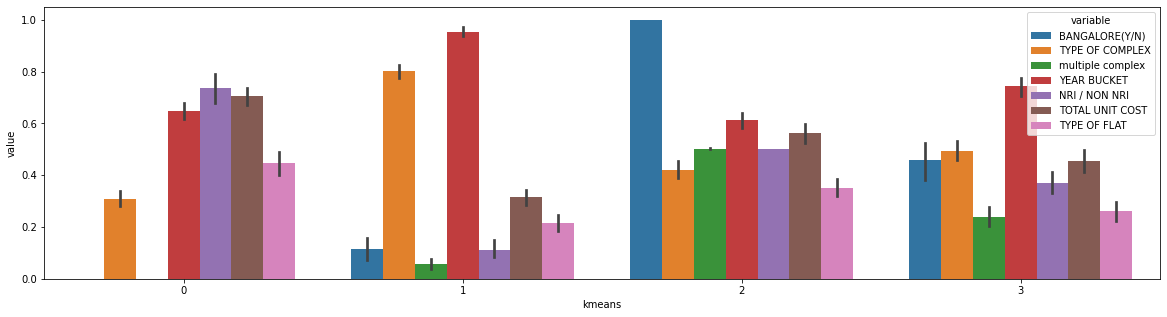

In [ ]:
plt.figure(figsize=(20,5))

results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(normalized_df[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(7).Variable.values) + ['kmeans']
tidy = df_scaled[selected_columns].melt(id_vars='kmeans')
sns.barplot(x='kmeans', y='value', hue='variable', data=tidy)

In [ ]:
c = dt['NRI / NON NRI'].astype('category')

d = dict(enumerate(c.cat.categories))
print(d)

{0: 'NO', 1: 'YES'}


In [ ]:
c = dt['BANGALORE(Y/N)'].astype('category')

d = dict(enumerate(c.cat.categories))
print(d)

{0: 'N', 1: 'Y'}


In [ ]:
c = dt['TYPE OF FLAT'].astype('category')

d = dict(enumerate(c.cat.categories))
print(d)

{0: '1 BHK', 1: '2 BHK', 2: '2 BHK ,2 BHK', 3: '2 BHK ,2 BHK ,2 BHK', 4: '2 BHK ,2 BHK ,2 BHK ,2 BHK', 5: '2 BHK ,3 BHK', 6: '2 BHK ,Duplex', 7: '2 BHK ,Plot -', 8: '2.5 BH', 9: '2.5 BH,2 BHK', 10: '2.5 BH,2.5 BH', 11: '2.5 BH,2.5 BH,3 BHK', 12: '2.5 BH,2.5 BH,3 BHK ,3 BHK ,3 BHK ,2.5 BH', 13: '2.5 BH,3 BHK', 14: '3 BHK', 15: '3 BHK ,2 BHK', 16: '3 BHK ,2.5 BH', 17: '3 BHK ,3 BHK', 18: '3 BHK ,3 BHK ,3 BHK', 19: '3 BHK ,3 BHK ,Duplex', 20: '3 BHK ,4 BHK', 21: '3 BHK ,4 BHK ,3 BHK', 22: '3BHK +', 23: '3BHK -', 24: '4 BHK', 25: '4 BHK ,3 BHK', 26: 'Duplex'}


In [ ]:
c = dt['CITY/STATE/COUNTRY'].astype('category')

d = dict(enumerate(c.cat.categories))
print(d)

{0: 'ABU DHABI', 1: 'ABUDHABI', 2: 'ANDHRA PRADESH', 3: 'AUSTRALIA', 4: 'BAHRAIN', 5: 'BANGALORE', 6: 'BELLARY', 7: 'BENGAL', 8: 'BHOPAL', 9: 'BIHAR', 10: 'BOX', 11: 'CHENNAI', 12: 'COIMBATORE', 13: 'DELHI', 14: 'DOHA', 15: 'DUBAI', 16: 'DUBAIUAE', 17: 'ENGLAND', 18: 'GOA', 19: 'GUJARAT', 20: 'GUWAHATI', 21: 'HARIHAR', 22: 'HUBLI', 23: 'HyDERABAD', 24: 'IISC', 25: 'INDONESIA', 26: 'JAMMU', 27: 'JAMSHEDPUR', 28: 'JHARKAND', 29: 'JUBAIL', 30: 'KARNATAKA', 31: 'KASHMIR', 32: 'KERALA', 33: 'KINGDOM', 34: 'KOLKATA', 35: 'KOLKATTA', 36: 'KUWAIT', 37: 'MALAYSIA', 38: 'MP', 39: 'MUMBAI', 40: 'MUSCAT', 41: 'MYSORE', 42: 'NAKODAR', 43: 'NASIK', 44: 'OMAN', 45: 'PALGHAT', 46: 'PRADESH', 47: 'PUNE', 48: 'PUNJAB', 49: 'QATAR', 50: 'RAWCHI', 51: 'SAUDI ARABIA', 52: 'SHANTINAGAR', 53: 'SINGAPORE', 54: 'TAMIL NADU', 55: 'TELANGANA', 56: 'THANE', 57: 'THIRUVANKULAM', 58: 'UAE', 59: 'UK', 60: 'UP', 61: 'USA', 62: 'USE', 63: 'UTTARAKHAND', 64: 'VIDYARANYAPURA', 65: 'WESTBENGAL'}


In [ ]:
c = dt['LANGUAGE'].astype('category')

d = dict(enumerate(c.cat.categories))
print(d)

{0: 'Asamese,Hindi', 1: 'Assamese', 2: 'Awadhi,BhojpuriorBraj', 3: 'Bengali', 4: 'Bengali,Hindi,Nepali', 5: 'Bengali,Telugu', 6: 'Gujarati', 7: 'Hind', 8: 'Hindi', 9: 'Hindi(Awadhi,BhojpuriorBraj),Marathi', 10: 'Hindi,Bengali,Odiya,Assamese', 11: 'Hindi,BengaliandAssamese', 12: 'Hindi,Chattisgarhi', 13: 'Hindi,Chhattisgarhi', 14: 'Hindi,Nepali', 15: 'Hindi,Rajastani', 16: 'Hindi.Kashmiri', 17: 'Kannada,Hindi,Telugu,Marati', 18: 'MaharashtrianandKannad', 19: 'Malayalam,tamil', 20: 'Marathi,Hindi', 21: 'Marwari,Hindi,Garhwali', 22: 'Nepali', 23: 'Odiya', 24: 'Oriya', 25: 'OtherLanguage', 26: 'OtherList', 27: 'Pubnjabi', 28: 'Punjabi', 29: 'Punjabi,Gujrati&Hindi', 30: 'Rajasthani', 31: 'Tamil,Malayalam', 32: 'Telegu', 33: 'Telugu', 34: 'Urdu'}


In [ ]:
c = dt['FLAT/PLOT'].astype('category')

d = dict(enumerate(c.cat.categories))
print(d)

{0: 'FLAT', 1: 'FLAT,FLAT', 2: 'FLAT,FLAT,FLAT', 3: 'FLAT,FLAT,FLAT,FLAT', 4: 'FLAT,FLAT,FLAT,FLAT,FLAT,FLAT,FLAT', 5: 'FLAT,PLOT'}


In [ ]:
c = dt['RELIGION SORTED'].astype('category')

d = dict(enumerate(c.cat.categories))
print(d)

{0: 'Christain', 1: 'Hindu', 2: 'Muslim', 3: 'OtherList', 4: 'Sikh'}


In [ ]:
c = dt['COMMUNITY'].astype('category')

d = dict(enumerate(c.cat.categories))
print(d)

{0: 0, 1: '(NorthIndia)Himachal,Rajasthan,Uttarakhand,U.P,Delhi', 2: 'Andhra', 3: 'AndhraPradesh', 4: 'AndraPradesh,Bengal', 5: 'Baidya', 6: 'Bania(Jain/Hindu)', 7: 'Baniya', 8: 'Bengali', 9: 'Bengali,Odiya,Punjabi', 10: 'BengaliBaniya', 11: 'BengaliGandhabanik', 12: 'BengaliKayasthas', 13: 'Brahmin', 14: 'Chamar', 15: 'Chattisgarhi', 16: 'Chhattisgarh', 17: 'DeshasthaBrahmins', 18: 'Gujarati', 19: 'Jain,HinduTraders', 20: 'Jat', 21: 'Karnataka,Maharastra,Rajastan,Andrapradesh,Telungana,Haryana', 22: 'KashmiriPandit', 23: 'Kayastha', 24: 'KayasthaofNorthIndia', 25: 'Kerala,Tamilnadu', 26: 'Khatri', 27: 'Khatris', 28: 'Landowners', 29: 'MadhyaPradesh', 30: 'MairRajputs/SikhRajputs', 31: 'Marathi', 32: 'MerchantCommunity', 33: 'Milkman', 34: 'Nepal', 35: 'Northernstates', 36: 'Orissa', 37: 'OtherList', 38: 'Peasant/PastoralCommunity', 39: 'Punjab,Southernstates', 40: 'Punjabi', 41: 'Punjabi,NimarregionofGujarat&MP', 42: 'PunjabiBrahmin', 43: 'PunjabiKhatri', 44: 'Rajasthani', 45: 'Rajput

In [ ]:
dt['code'] = dt['LANGUAGE'].astype('category').cat.codes

dt['level_back'] = dt['code'].map(d)
print(dt)

dt.to_csv("LANGU.csv")

      AGE                                            ADDRESS  ... code level_back
0     NaN                                                  0  ...    3    Bengali
1     NaN  Mr. Savina G B No.13 Gare Ravikumar Layout Byc...  ...   -1        NaN
2     NaN                                                  0  ...   28    Punjabi
3     NaN  Mr.Umer Farooque.P#251st Cross 1st Main L  B S...  ...   -1        NaN
4     NaN  Mr. Ramesh SEmp.No.2720 Honeywell #151/1 Dorai...  ...   -1        NaN
..    ...                                                ...  ...  ...        ...
737  32.0  Jail Road, Near East, D.M Kothi Gate, Gewalbig...  ...   28    Punjabi
738  49.0  06, ASD Complex Bharti Nagar, H M Halli Post, ...  ...   -1        NaN
739  37.0  Aashavilla, 2nd floor, flat 4, 17, Kalupara La...  ...    3    Bengali
740  39.0  A2-302, Tungabhadra Block, National Game Villa...  ...   -1        NaN
741  34.0  No.2 1st Cross, Anjana Layout, Near Brindavan ...  ...   -1        NaN

[742 rows x 25 